# TramDag API

For this file you need to have a configuration file --> built manually or by the constructor 1_create_configuration_file.ipynb

the file structure for an experiment should be 

my_experiment_name/configuration.json

whereas my_experiment_name is the name in the configuration file

## DATA

in this example, some data is generated , make sure that the variable names are the same as in the config file

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import pandas as pd

X, _ = make_blobs(n_samples=100_000,centers=3, n_features=7)
df = pd.DataFrame(X, columns=["x1", "x2", "x3","x4", "x5", "x6", "x7"])

# 1. Split the data
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

## Configuration

/home/bule/TramDag/utils/tramdag.py:251: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


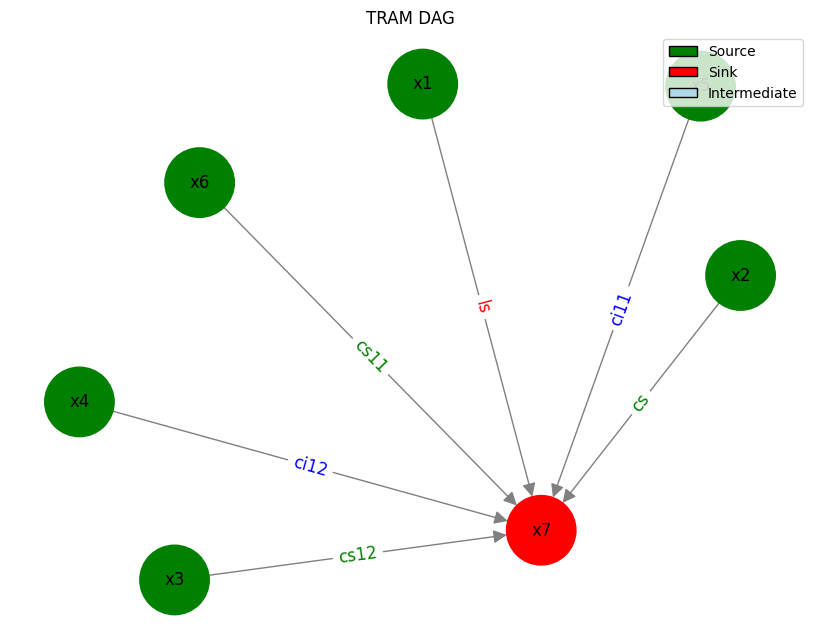

In [ ]:
from utils.tramdag import *

# load the configuration to a TramDagConfig object
cfg = TramDagConfig.load("/home/bule/TramDag/dev_experiment_logs/test_Dataset/configuration.json")

# inspect the DAG
cfg.plot_dag()

# set device to cpu , default mode is automatic detection 
device='cpu' 

In [ ]:

# Create TramDagDataset for training data
TramDagDataset.from_dataframe(cfg=cfg,df=train_df,debug=True)

[DEBUG] TramDagDataset.from_dataframe() settings (after defaults + overrides):
    batch_size: 32000
    shuffle: True
    num_workers: 4
    pin_memory: True
    return_intercept_shift: True
    debug: True
    transform: None
    use_dataloader: True
    use_precomputed: False
    sampler: None
    batch_sampler: None
    collate_fn: None
    drop_last: False
    timeout: 0
    worker_init_fn: None
    multiprocessing_context: None
    generator: None
    prefetch_factor: 2
    persistent_workers: True
    pin_memory_device: 
[DEBUG] Set df: type=<class 'pandas.core.frame.DataFrame'>, shape=(80000, 7)
[DEBUG] Set target_col: type=<class 'str'>, value=x1
[DEBUG] Set all_nodes_dict: type=<class 'dict'>, keys=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']
[DEBUG] Set parents_datatype_dict: type=<class 'collections.OrderedDict'>, keys=[]
[DEBUG] Set transformation_terms_preprocessing: type=<class 'list'>, value=[]
[DEBUG] Set predictors: type=<class 'list'>, value=[]
[DEBUG] Set transform: t

## TD Model

In [4]:

td_model = TramDagModel.from_config(cfg, set_initial_weights=False,verbose=True,debug=False,device=device) 

## Fit

In [5]:
td_model.fit(train_df, val_df,
             epochs=12,batch_size=1_000,
             prefetch_factor=2,
             num_workers=8,
             persistent_workers=True,
             verbose=True,debug=False,
             device=device,
             train_mode = "sequential",use_dataloader=True)#,

[INFO] Computing new minmax dict from training data...
[INFO] Saved new minmax dict to /home/bule/TramDag/dev_experiment_logs/test_Dataset/min_max_scaling.json
[INFO] Training 7 nodes (sequential) on cpu

[INFO] Training node 'x1' for 12 epochs on cpu (pid=143230)
[INFO] Existing model found. Loading weights and history...

[INFO] Training node 'x2' for 12 epochs on cpu (pid=143230)
[INFO] Existing model found. Loading weights and history...

[INFO] Training node 'x3' for 12 epochs on cpu (pid=143230)
[INFO] Existing model found. Loading weights and history...

[INFO] Training node 'x4' for 12 epochs on cpu (pid=143230)
[INFO] Existing model found. Loading weights and history...

[INFO] Training node 'x5' for 12 epochs on cpu (pid=143230)
[INFO] Existing model found. Loading weights and history...

[INFO] Training node 'x6' for 12 epochs on cpu (pid=143230)
[INFO] Existing model found. Loading weights and history...

[INFO] Training node 'x7' for 12 epochs on cpu (pid=143230)
[INFO] Ex

## Sampling, Interventions

In [6]:
# td_model.sample(device='cuda',delete_previously_sampled=False,verbose=True, debug=False)
td_model.load_sampled_and_latents()

[INFO] Loaded sampled and latent tensors for 7 nodes from /home/bule/TramDag/dev_experiment_logs/test_Dataset


({'x1': tensor([-7.9302, 16.4686,  4.6837,  ..., -7.2808,  6.2745, 13.1128]),
  'x2': tensor([ -6.5681,  -2.8937, -14.7616,  ..., -10.6629,  -0.0759,   0.2315]),
  'x3': tensor([-15.8662, -16.3286, -20.2784,  ..., -13.9569,   2.5420,  -5.3318]),
  'x4': tensor([ 0.1268, -2.1326, -1.2361,  ..., -2.3406, -6.2671, -1.8796]),
  'x5': tensor([ -9.8685, -12.6060,   3.7325,  ...,  -5.3907,  -3.5023,  -2.8872]),
  'x6': tensor([-9.4500, 11.6208,  3.2101,  ...,  5.8033, -8.1776, -6.4221]),
  'x7': tensor([ 6.0412,  4.8276, -5.2037,  ..., -4.2279, -2.3427,  0.0884])},
 {'x1': tensor([-1.0153,  3.2792,  0.3218,  ..., -0.8450,  0.6059,  2.3630]),
  'x2': tensor([-0.2668,  0.4673, -3.2922,  ..., -1.6501,  1.1258,  1.1995]),
  'x3': tensor([-2.3201, -2.4393, -3.4571,  ..., -1.8281, -0.0379, -0.1942]),
  'x4': tensor([ 0.3878, -0.5851, -0.1348,  ..., -0.6933, -2.8391, -0.4545]),
  'x5': tensor([-1.8443, -2.6656,  1.4620,  ..., -0.5555, -0.0883,  0.0665]),
  'x6': tensor([-1.5492,  2.3811,  0.2287,  .

In [8]:
sampled, latents=td_model.load_sampled_and_latents()

[INFO] Loaded sampled and latent tensors for 7 nodes from /home/bule/TramDag/dev_experiment_logs/test_Dataset


In [ ]:
latents=td_model.get_latent( train_df)
latents.head()

[INFO] Final latent DataFrame shape: (80000, 14)


,x1,x1_U,x2,x2_U,x3,x3_U,x4,x4_U,x5,x5_U,x6,x6_U,x7,x7_U
75220,6.412734,0.829544,9.762452,1.956630,-0.883840,-0.186200,-2.292104,-0.043447,5.014959,1.582133,-7.183530,-0.839901,3.775535,1.893680
48955,8.585145,1.334093,8.241475,1.200048,1.153732,-0.149682,-4.176771,-1.673783,5.233456,1.638453,-5.572570,-0.164334,1.481199,-2.120111
44966,-7.793274,-0.538476,0.659128,-0.989078,-4.563494,-0.898398,0.694650,0.713880,6.193397,1.910213,-1.467279,0.579381,5.095269,1.593398
13568,-8.697749,-0.719524,9.890024,2.033132,9.490143,1.222481,-1.323081,0.486967,-5.995290,-1.050661,-1.399503,0.607680,2.827480,0.131178
92727,8.494204,1.312475,4.969030,0.211403,0.688659,-0.153364,-2.041547,0.139004,4.614970,1.483857,-6.521675,-0.445257,2.974970,0.617226
